In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import itertools
import statistics 
import math
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dfbtc2019 = pd.read_csv(r'D:\COURSE MATERIALS\Predictive Analytics\project\btc2019.csv')    
dfvader = pd.read_csv(r'D:\COURSE MATERIALS\Predictive Analytics\project\dfVader.csv')
dftxtbl = pd.read_excel(r'D:\COURSE MATERIALS\Predictive Analytics\project\reddit_dataset_sentiment.xlsx')


In [3]:
dfbtc2019.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff
0,2,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN
1,3,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,3843.520020,99.889404
2,4,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,3943.409424,-106.668213
3,5,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,3836.741211,20.976318
4,6,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,3857.717529,-12.522949


In [4]:
dfvader.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,X.1,X,datetime,date,author,subreddit,created_utc,score,controversiality,body,answer,scores_vader,compound,comp_score,neg,neu,pos
0,0,0,1,1,3700050,2019-11-07 00:00:00,2019-11-07 00:00:00,bstheory,AskReddit,1573084833,78,0,SS Giving up too easily trying to buy bitcoin ...,SS Giving easily trying buy bitcoin 30,"{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...",0.5859,pos,0.000,0.510,0.490
1,1,1,2,2,3700051,2019-11-25 00:31:00,2019-11-25 00:00:00,park_injured,bitcoincashSV,1574641887,-10,0,"Of course Bitcoin holds strong against itself,...",Of course Bitcoin holds strong coin Its always...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.7430,pos,0.000,0.730,0.270
2,2,2,3,3,3700052,2019-11-13 00:28:00,2019-11-13 00:00:00,Tadejus89,CryptoCurrency,1573604880,18,0,I wish korean shitcoin Icon would just die off...,I wish korean shitcoin Icon just die quickly I...,"{'neg': 0.254, 'neu': 0.572, 'pos': 0.174, 'co...",-0.9284,neg,0.254,0.572,0.174
3,3,3,4,4,3700053,2019-11-19 01:51:00,2019-11-19 00:00:00,Slayer706,Buttcoin,1574128260,15,0,How could anyone steal anything from Craig Wri...,How anyone steal anything Craig Wright Hes sup...,"{'neg': 0.141, 'neu': 0.712, 'pos': 0.147, 'co...",0.1027,pos,0.141,0.712,0.147
4,4,4,5,5,3700054,2019-11-09 02:16:00,2019-11-09 00:00:00,ChuckJA,financialindependence,1573265806,105,0,"Iâ€™ll be the contrarian, I guess:\n\nItâ€™s l...",Ill contrarian I guess Its late 2009 I enliste...,"{'neg': 0.138, 'neu': 0.808, 'pos': 0.054, 'co...",-0.6588,neg,0.138,0.808,0.054


In [5]:
dftxtbl.head()

,Unnamed: 0,Unnamed: 0.1,X,datetime,date,author,subreddit,created_utc,score,controversiality,body,answer,Subjectivity_score,Polarity_score,Sentiment
0,0,1,3700050,2019-11-07 00:00:33,2019-11-07,bstheory,AskReddit,1573084833,78,0,SS Giving up too easily trying to buy bitcoin ...,SS Giving easily trying buy bitcoin 30,0.833333,0.433333,pos
1,1,2,3700051,2019-11-25 00:31:27,2019-11-25,park_injured,bitcoincashSV,1574641887,-10,0,"Of course Bitcoin holds strong against itself,...",Of course Bitcoin holds strong coin Its always...,0.311111,0.144444,pos
2,2,3,3700052,2019-11-13 00:28:00,2019-11-13,Tadejus89,CryptoCurrency,1573604880,18,0,I wish korean shitcoin Icon would just die off...,I wish korean shitcoin Icon just die quickly I...,0.561111,-0.006481,neg
3,3,4,3700053,2019-11-19 01:51:00,2019-11-19,Slayer706,Buttcoin,1574128260,15,0,How could anyone steal anything from Craig Wri...,How anyone steal anything Craig Wright Hes sup...,0.469444,-0.036111,neg
4,4,5,3700054,2019-11-09 02:16:46,2019-11-09,ChuckJA,financialindependence,1573265806,105,0,"Iâ€™ll be the contrarian, I guess:\n\nItâ€™s l...",Ill contrarian I guess Its late 2009 I enliste...,0.422727,-0.003030,neg


In [4]:
#VADER input

bindvader = pd.DataFrame()
bindvader.head()

bindvader['datevader'] = dfvader['date']
bindvader['scorevader'] = dfvader['compound']
bindvader['negvader'] = dfvader['neg']
bindvader['neuvader'] = dfvader['neu']
bindvader['posvader'] = dfvader['pos']
bindvader['votevader'] = dfvader['score']
bindvader['posnegvader'] = dfvader['comp_score']
bindvader['count'] = 0
bindvader['datevader'] = pd.to_datetime(bindvader['datevader'], format='%Y/%m/%d %H:%M:%S')

In [5]:
bindvader = bindvader.sort_values(by=['datevader'])

bindvader['posnegvader'] = bindvader['posnegvader'].replace(["pos", "neg"],[1,-1])

bindvader = bindvader.groupby('datevader').agg({'scorevader':'mean', 'votevader':'mean', 'posnegvader':'mean', 'negvader':'mean',
                                                'neuvader':'mean','posvader':'mean','count':'size'}).reset_index()

In [6]:
bindvader.head(20)

,datevader,scorevader,votevader,posnegvader,negvader,neuvader,posvader,count
0,2019-01-01,0.267587,4.170678,0.496718,0.656667,0.246464,0.261795,914
1,2019-01-02,0.256855,4.300077,0.509667,0.663167,0.239356,0.254775,1293
2,2019-01-03,0.233948,6.055873,0.479365,0.669608,0.235708,0.234854,1575
3,2019-01-04,0.242683,7.009467,0.479290,0.643596,0.254402,0.240924,1690
4,2019-01-05,0.216317,4.468270,0.433534,0.652838,0.240070,0.213759,1497
5,2019-01-06,0.249730,4.610130,0.459708,0.635766,0.261469,0.247599,1303
6,2019-01-07,0.258816,4.644128,0.498932,0.667053,0.238179,0.251976,1405
7,2019-01-08,0.215337,4.983972,0.443902,0.652167,0.249211,0.226133,1435
8,2019-01-09,0.206315,3.690612,0.446657,0.658437,0.240334,0.207493,1406
9,2019-01-10,0.189383,4.170043,0.387844,0.659801,0.231928,0.195640,1382


In [7]:
dfbtc2019['Date'] = pd.to_datetime(dfbtc2019['Date'])
mergevader = bindvader.merge(dfbtc2019, left_on='datevader', right_on='Date')


In [8]:
del mergevader[mergevader.columns.values[8]]
del mergevader[mergevader.columns.values[8]]

In [9]:
mergevader.head(10)

,datevader,scorevader,votevader,posnegvader,negvader,neuvader,posvader,count,Open,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff
0,2019-01-01,0.267587,4.170678,0.496718,0.656667,0.246464,0.261795,914,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN
1,2019-01-02,0.256855,4.300077,0.509667,0.663167,0.239356,0.254775,1293,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,3843.520020,99.889404
2,2019-01-03,0.233948,6.055873,0.479365,0.669608,0.235708,0.234854,1575,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,3943.409424,-106.668213
3,2019-01-04,0.242683,7.009467,0.479290,0.643596,0.254402,0.240924,1690,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,3836.741211,20.976318
4,2019-01-05,0.216317,4.468270,0.433534,0.652838,0.240070,0.213759,1497,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,3857.717529,-12.522949
5,2019-01-06,0.249730,4.610130,0.459708,0.635766,0.261469,0.247599,1303,3836.519043,4093.297363,3826.513184,4076.632568,4076.632568,5597027440,3845.194580,231.437988
6,2019-01-07,0.258816,4.644128,0.498932,0.667053,0.238179,0.251976,1405,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5228625637,4076.632568,-51.384277
7,2019-01-08,0.215337,4.983972,0.443902,0.652167,0.249211,0.226133,1435,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5306593305,4025.248291,5.599609
8,2019-01-09,0.206315,3.690612,0.446657,0.658437,0.240334,0.207493,1406,4031.552002,4068.403564,4022.662842,4035.296387,4035.296387,5115905225,4030.847900,4.448487
9,2019-01-10,0.189383,4.170043,0.387844,0.659801,0.231928,0.195640,1382,4034.411377,4064.066650,3659.174561,3678.924561,3678.924561,6874143796,4035.296387,-356.371826


In [10]:
#Applying random forest for VADER without open price

vadselect = pd.DataFrame()
vadselect['MeanScore'] = mergevader['scorevader']
vadselect['MeanVote'] = mergevader['votevader']
vadselect['MeanPosNeg'] = mergevader['posnegvader']
vadselect['PostCount'] = mergevader['count']
vadselect['MeanNeg'] = mergevader['negvader']
vadselect['MeanNeu'] = mergevader['neuvader']
vadselect['MeanPos'] = mergevader['posvader']
vadselect['Close'] = mergevader['Close']

In [11]:
vadselect.head(10)

,MeanScore,MeanVote,MeanPosNeg,PostCount,MeanNeg,MeanNeu,MeanPos,Close
0,0.267587,4.170678,0.496718,914,0.656667,0.246464,0.261795,3843.520020
1,0.256855,4.300077,0.509667,1293,0.663167,0.239356,0.254775,3943.409424
2,0.233948,6.055873,0.479365,1575,0.669608,0.235708,0.234854,3836.741211
3,0.242683,7.009467,0.479290,1690,0.643596,0.254402,0.240924,3857.717529
4,0.216317,4.468270,0.433534,1497,0.652838,0.240070,0.213759,3845.194580
5,0.249730,4.610130,0.459708,1303,0.635766,0.261469,0.247599,4076.632568
6,0.258816,4.644128,0.498932,1405,0.667053,0.238179,0.251976,4025.248291
7,0.215337,4.983972,0.443902,1435,0.652167,0.249211,0.226133,4030.847900
8,0.206315,3.690612,0.446657,1406,0.658437,0.240334,0.207493,4035.296387
9,0.189383,4.170043,0.387844,1382,0.659801,0.231928,0.195640,3678.924561


In [12]:
#splitting data into test and split

x_train,x_test,y_train,y_test = train_test_split(vadselect.drop(['Close'],1), vadselect['Close'], test_size=0.20,
                                                 random_state=0, shuffle=True)

C:\Users\USER-PC\AppData\Local\Temp/ipykernel_9296/1156870692.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train,x_test,y_train,y_test = train_test_split(vadselect.drop(['Close'],1), vadselect['Close'], test_size=0.20,


In [17]:
#Applying random forest for VADER without open price

randomForest = RandomForestRegressor(random_state = 42, n_estimators = 20, max_depth = 4, min_samples_split=10, min_samples_leaf=3,bootstrap = True)

rfregr = randomForest.fit(x_train, y_train)

In [16]:
#RandomizedCV Hyperparameter tuning

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=randomForest, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)



Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 12, 'bootstrap': True}


In [19]:
closePredicted = randomForest.predict(x_test)

In [20]:
testdf = pd.DataFrame()
testdf['actual'] = y_test
testdf['predicted'] = closePredicted
testdf['diff'] = 0
testdf['pctg'] = 0

for i in range(0,len(testdf)):
           testdf['diff'].iloc[i] = abs(testdf['actual'].iloc[i] - testdf['predicted'].iloc[i])
          
for i in range(0,len(testdf)) :
            testdf['pctg'].iloc[i] = (testdf['diff'].iloc[i]/testdf['actual'].iloc[i]) * 100


C:\Users\USER-PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
print("Maximum Error Value: " +"{:.2f}".format(max(testdf['diff'])))
print("Minimum Error Value: " +"{:.2f}".format(min(testdf['diff'])))
print("Average Error Value: "+"{:.2f}".format(statistics.mean(testdf['diff'])))
print(" ")
print("Maximum Error Percentage: "+"{:.2f}".format(max(testdf['pctg'])))
print("Minimum Error Percentage: "+"{:.2f}".format(min(testdf['pctg'])))
print("Average Error Percentage: "+"{:.2f}".format(statistics.mean(testdf['pctg'])))


Maximum Error Value: 4814.96
Minimum Error Value: 13.48
Average Error Value: 1022.53
 
Maximum Error Percentage: 82.19
Minimum Error Percentage: 0.28
Average Error Percentage: 16.96


In [22]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, closePredicted), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, closePredicted), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, closePredicted)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, closePredicted), 4))
print(f'Train Score : {randomForest.score(x_train, y_train) * 100:.2f}% and Test Score : {randomForest.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(closePredicted - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1022.5315
Mean Squared Error: 1889594.5619
Root Mean Squared Error: 1374.6252
(R^2) Score: 0.7398
Train Score : 73.38% and Test Score : 73.98% using Random Tree Regressor.
Accuracy: 83.04 %.


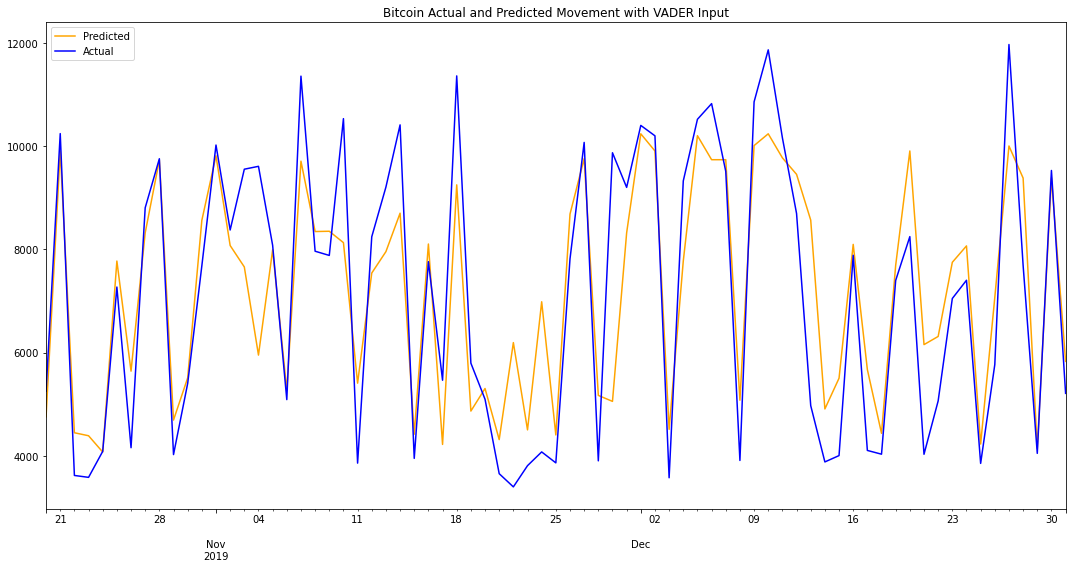

In [23]:
testplt = testdf

plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams["figure.autolayout"] = True

plt.title('Bitcoin Actual and Predicted Movement with VADER Input')

testplt = testplt.set_index(pd.date_range('2019-10-20', periods = len(testplt)))

axis1 = testplt.predicted.plot(color = 'orange', label = 'Predicted')
#axis2 = testplt.actual.plot(color = 'blue', secondary_y=True, label='Actual')
axis2 = testplt.actual.plot(color = 'blue', label='Actual')


h1, l1 = axis1.get_legend_handles_labels()
h2, l2 = axis2.get_legend_handles_labels()

#plt.legend(h1+h2, l1+l2, loc=2)
plt.legend(h1, l1, loc=2)


plt.show()

    Attribute  Importance
4     MeanNeg    0.370593
3   PostCount    0.302371
5     MeanNeu    0.220235
1    MeanVote    0.058582
2  MeanPosNeg    0.031361
6     MeanPos    0.008945
0   MeanScore    0.007914


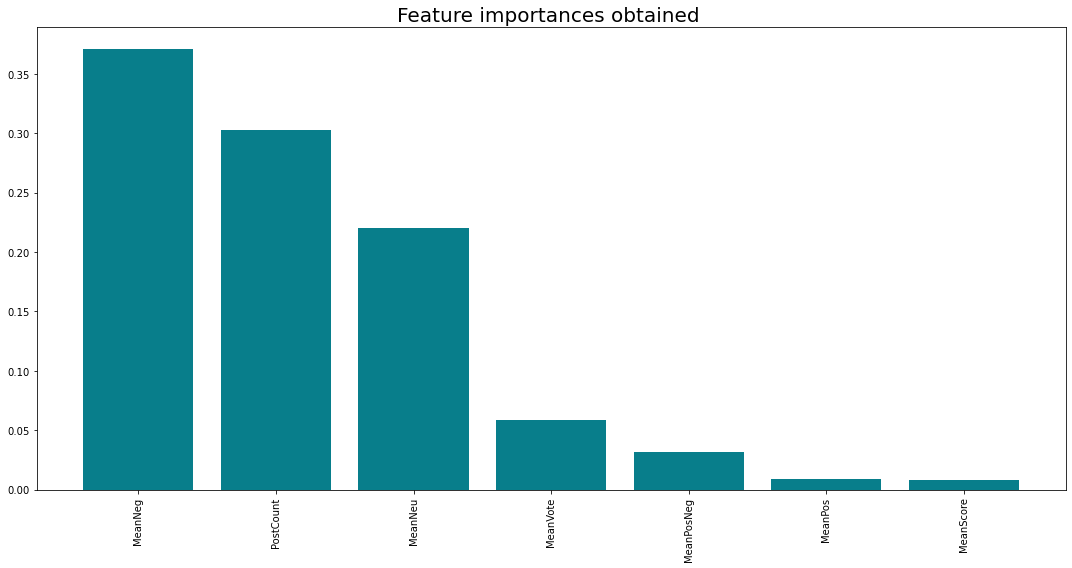

In [25]:

importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': randomForest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

print(importances)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained ', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
#Applying random forest for VADER with open price

vadselect = pd.DataFrame()
vadselect['MeanScore'] = mergevader['scorevader']
vadselect['MeanVote'] = mergevader['votevader']
vadselect['MeanPosNeg'] = mergevader['posnegvader']
vadselect['PostCount'] = mergevader['count']
vadselect['MeanNeg'] = mergevader['negvader']
vadselect['MeanNeu'] = mergevader['neuvader']
vadselect['MeanPos'] = mergevader['posvader']
vadselect['Open'] = mergevader['Open']
vadselect['Close'] = mergevader['Close']

In [27]:
#splitting data into test and split

x_train,x_test,y_train,y_test = train_test_split(vadselect.drop(['Close'],1), vadselect['Close'], test_size=0.20,
                                                 random_state=0, shuffle=True)

C:\Users\USER-PC\AppData\Local\Temp/ipykernel_9296/1156870692.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train,x_test,y_train,y_test = train_test_split(vadselect.drop(['Close'],1), vadselect['Close'], test_size=0.20,


In [28]:
#Applying random forest for VADER with open price

randomForest = RandomForestRegressor(random_state = 1, n_estimators = 100, max_depth = 5, min_samples_split=9, min_samples_leaf=1,bootstrap = True)

rfregr = randomForest.fit(x_train, y_train)

In [ ]:
#RandomizedCV Hyperparameter tuning

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=randomForest, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)


In [29]:
closePredicted = randomForest.predict(x_test)

In [30]:
testdf = pd.DataFrame()
testdf['actual'] = y_test
testdf['predicted'] = closePredicted
testdf['diff'] = 0
testdf['pctg'] = 0

for i in range(0,len(testdf)):
           testdf['diff'].iloc[i] = abs(testdf['actual'].iloc[i] - testdf['predicted'].iloc[i])
          
for i in range(0,len(testdf)) :
            testdf['pctg'].iloc[i] = (testdf['diff'].iloc[i]/testdf['actual'].iloc[i]) * 100

C:\Users\USER-PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
print("Maximum Error Value: " +"{:.2f}".format(max(testdf['diff'])))
print("Minimum Error Value: " +"{:.2f}".format(min(testdf['diff'])))
print("Average Error Value: "+"{:.2f}".format(statistics.mean(testdf['diff'])))
print(" ")
print("Maximum Error Percentage: "+"{:.2f}".format(max(testdf['pctg'])))
print("Minimum Error Percentage: "+"{:.2f}".format(min(testdf['pctg'])))
print("Average Error Percentage: "+"{:.2f}".format(statistics.mean(testdf['pctg'])))

Maximum Error Value: 770.00
Minimum Error Value: 0.37
Average Error Value: 159.25
 
Maximum Error Percentage: 20.21
Minimum Error Percentage: 0.01
Average Error Percentage: 2.25


In [32]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, closePredicted), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, closePredicted), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, closePredicted)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, closePredicted), 4))
print(f'Train Score : {randomForest.score(x_train, y_train) * 100:.2f}% and Test Score : {randomForest.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(closePredicted - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 159.2514
Mean Squared Error: 50213.4088
Root Mean Squared Error: 224.0835
(R^2) Score: 0.9931
Train Score : 99.21% and Test Score : 99.31% using Random Tree Regressor.
Accuracy: 97.75 %.


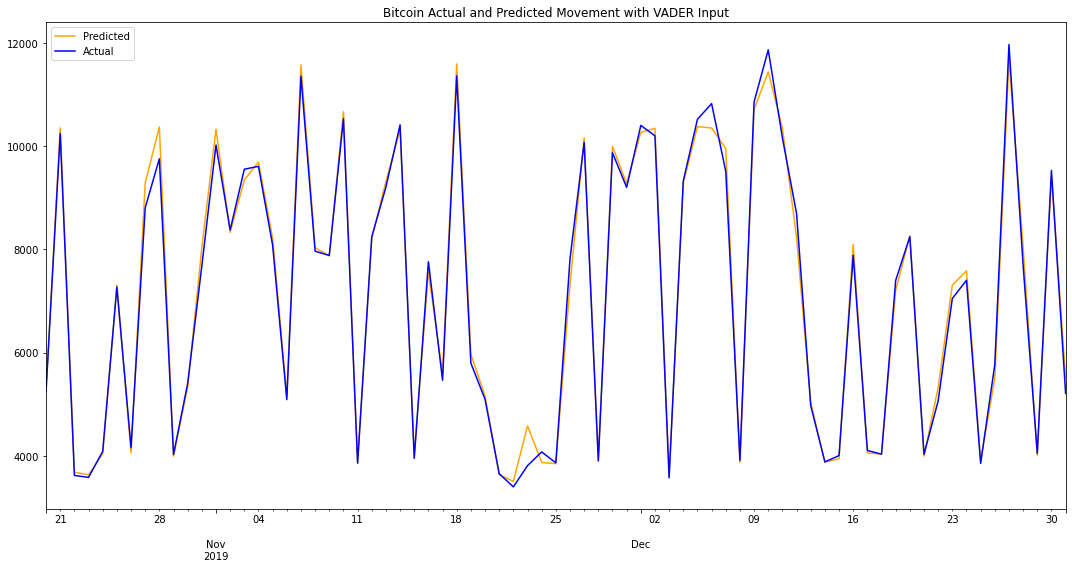

In [33]:
testplt = testdf

plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams["figure.autolayout"] = True

plt.title('Bitcoin Actual and Predicted Movement with VADER Input')

testplt = testplt.set_index(pd.date_range('2019-10-20', periods = len(testplt)))

axis1 = testplt.predicted.plot(color = 'orange', label = 'Predicted')
#axis2 = testplt.actual.plot(color = 'blue', secondary_y=True, label='Actual')
axis2 = testplt.actual.plot(color = 'blue', label='Actual')


h1, l1 = axis1.get_legend_handles_labels()
h2, l2 = axis2.get_legend_handles_labels()

#plt.legend(h1+h2, l1+l2, loc=2)
plt.legend(h1, l1, loc=2)


plt.show()

In [34]:
#TEXTBLOB input

bindtxtb = pd.DataFrame()
bindtxtb.head()

bindtxtb['datetxtb'] = dftxtbl['date']
bindtxtb['scorestxtb'] = dftxtbl['Subjectivity_score']
bindtxtb['scoreptxtb'] = dftxtbl['Polarity_score']
bindtxtb['votetxtb'] = dftxtbl['score']
bindtxtb['posnegtxtb'] = dftxtbl['Sentiment']
bindtxtb['count'] = 0


In [35]:
bindtxtb = bindtxtb.sort_values(by=['datetxtb'])
bindtxtb['posnegtxtb'] = bindtxtb['posnegtxtb'].replace(["pos", "neg"],[1,-1])

In [36]:
bindtxtb = bindtxtb.groupby('datetxtb').agg({'scorestxtb':'mean', 'scoreptxtb':'mean', 'votetxtb':'mean', 
                                             'posnegtxtb':'mean', 'count':'size'}).reset_index()


In [37]:
mergetxtb = bindtxtb.merge(dfbtc2019, left_on='datetxtb', right_on='Date')

In [38]:
del mergetxtb[mergetxtb.columns.values[6]]
del mergetxtb[mergetxtb.columns.values[6]]

In [39]:
mergetxtb.head()

,datetxtb,scorestxtb,scoreptxtb,votetxtb,posnegtxtb,count,Open,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff
0,2019-01-01,0.435777,0.089948,4.170678,0.549234,914,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN
1,2019-01-02,0.410252,0.085668,4.300077,0.604022,1293,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,3843.520020,99.889404
2,2019-01-03,0.411385,0.090782,6.055873,0.587302,1575,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,3943.409424,-106.668213
3,2019-01-04,0.419168,0.089015,7.009467,0.562130,1690,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,3836.741211,20.976318
4,2019-01-05,0.418633,0.070175,4.468270,0.497662,1497,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,3857.717529,-12.522949


In [40]:
#Applying textblob input without open price

txbselect = pd.DataFrame()
txbselect['MeanSubjScore'] = mergetxtb['scorestxtb']
txbselect['MeanPolScore'] = mergetxtb['scoreptxtb']
txbselect['MeanVote'] = mergetxtb['votetxtb']
txbselect['MeanPosNeg'] = mergetxtb['posnegtxtb']
txbselect['PostCount'] = mergetxtb['count']
txbselect['Close'] = mergetxtb['Close']

In [41]:
txbselect.head(10)

,MeanSubjScore,MeanPolScore,MeanVote,MeanPosNeg,PostCount,Close
0,0.435777,0.089948,4.170678,0.549234,914,3843.520020
1,0.410252,0.085668,4.300077,0.604022,1293,3943.409424
2,0.411385,0.090782,6.055873,0.587302,1575,3836.741211
3,0.419168,0.089015,7.009467,0.562130,1690,3857.717529
4,0.418633,0.070175,4.468270,0.497662,1497,3845.194580
5,0.421435,0.080508,4.610130,0.564083,1303,4076.632568
6,0.416643,0.090963,4.644128,0.605694,1405,4025.248291
7,0.411458,0.093268,4.983972,0.616725,1435,4030.847900
8,0.410200,0.083630,3.690612,0.573257,1406,4035.296387
9,0.417104,0.076001,4.170043,0.520984,1382,3678.924561


In [42]:
#Splitting the data

x_train,x_test,y_train,y_test = train_test_split(txbselect.drop(['Close'],1), txbselect['Close'], test_size=0.20, 
                                                 random_state=0, shuffle=True)

C:\Users\USER-PC\AppData\Local\Temp/ipykernel_9296/846759869.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train,x_test,y_train,y_test = train_test_split(txbselect.drop(['Close'],1), txbselect['Close'], test_size=0.20,


In [43]:
#Applying Textblob input without open price

randomForest = RandomForestRegressor(random_state = 42, n_estimators = 50, max_depth = 4, min_samples_split= 9, min_samples_leaf=1,bootstrap = True)

rfregr = randomForest.fit(x_train, y_train)

In [ ]:
#RandomizedCV Hyperparameter tuning

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=randomForest, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)


In [44]:
#predict the test

closePredicted = randomForest.predict(x_test)

In [45]:
testdf = pd.DataFrame()
testdf['actual'] = y_test
testdf['predicted'] = closePredicted
testdf['diff'] = 0
testdf['pctg'] = 0

for i in range(0,len(testdf)):
           testdf['diff'].iloc[i] = abs(testdf['actual'].iloc[i] - testdf['predicted'].iloc[i])
        
  
for i in range(0,len(testdf)) :
            testdf['pctg'].iloc[i] = (testdf['diff'].iloc[i]/testdf['actual'].iloc[i]) * 100


C:\Users\USER-PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
print("Maximum Error Value: " +"{:.2f}".format(max(testdf['diff'])))
print("Minimum Error Value: " +"{:.2f}".format(min(testdf['diff'])))
print("Average Error Value: "+"{:.2f}".format(statistics.mean(testdf['diff'])))
print(" ")
print("Maximum Error Percentage: "+"{:.2f}".format(max(testdf['pctg'])))
print("Minimum Error Percentage: "+"{:.2f}".format(min(testdf['pctg'])))
print("Average Error Percentage: "+"{:.2f}".format(statistics.mean(testdf['pctg'])))

Maximum Error Value: 5076.33
Minimum Error Value: 26.60
Average Error Value: 2257.56
 
Maximum Error Percentage: 112.73
Minimum Error Percentage: 0.37
Average Error Percentage: 39.29


In [47]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, closePredicted), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, closePredicted), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, closePredicted)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, closePredicted), 4))
print(f'Train Score : {randomForest.score(x_train, y_train) * 100:.2f}% and Test Score : {randomForest.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(closePredicted - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 2257.5609
Mean Squared Error: 6163224.5337
Root Mean Squared Error: 2482.5842
(R^2) Score: 0.1514
Train Score : 38.69% and Test Score : 15.14% using Random Tree Regressor.
Accuracy: 60.71 %.


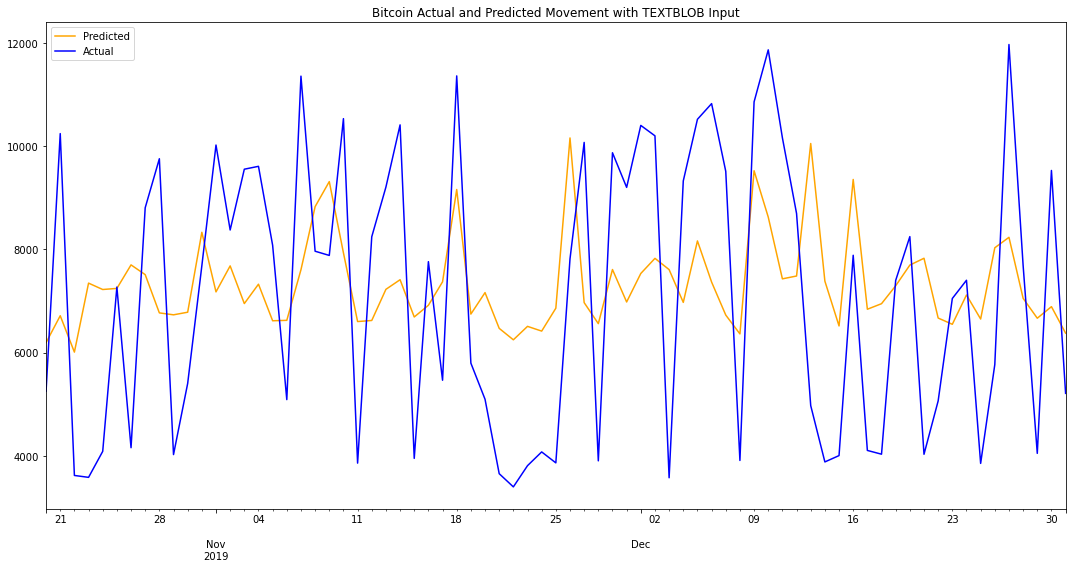

In [48]:
testplt = testdf

plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams["figure.autolayout"] = True

plt.title('Bitcoin Actual and Predicted Movement with TEXTBLOB Input')

testplt = testplt.set_index(pd.date_range('2019-10-20', periods = len(testplt)))

axis1 = testplt.predicted.plot(color = 'orange', label = 'Predicted')
#axis2 = testplt.actual.plot(color = 'blue', secondary_y=True, label='Actual')
axis2 = testplt.actual.plot(color = 'blue', label='Actual')


h1, l1 = axis1.get_legend_handles_labels()
h2, l2 = axis2.get_legend_handles_labels()

#plt.legend(h1+h2, l1+l2, loc=2)
plt.legend(h1, l1, loc=2)


plt.show()


       Attribute  Importance
4      PostCount    0.417579
0  MeanSubjScore    0.207990
2       MeanVote    0.159517
3     MeanPosNeg    0.125317
1   MeanPolScore    0.089597


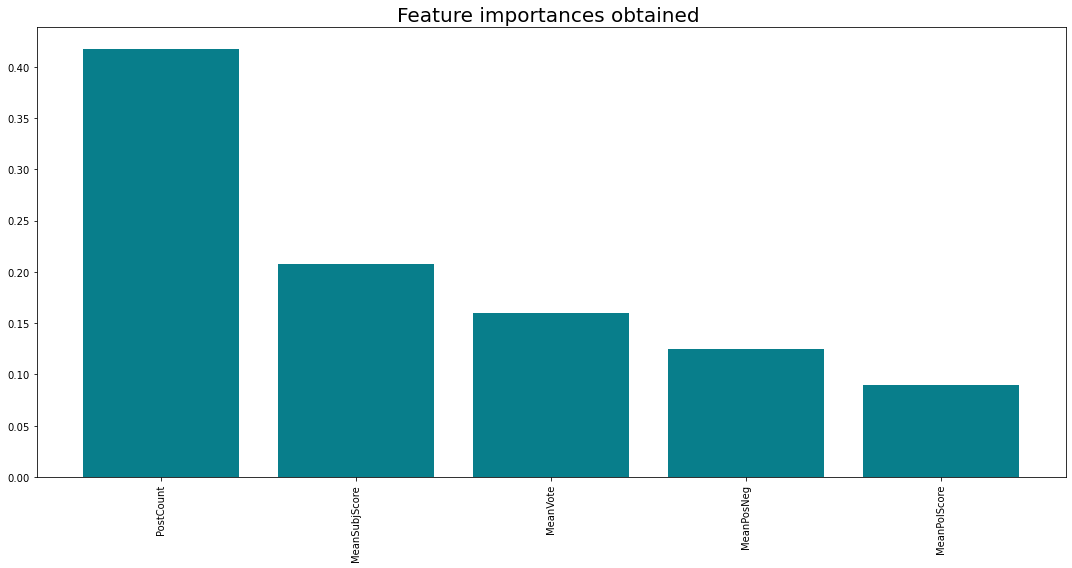

In [49]:

importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': randomForest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

print(importances)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained ', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
#Applying textblob input with open price

txbselect = pd.DataFrame()
txbselect['MeanSubjScore'] = mergetxtb['scorestxtb']
txbselect['MeanPolScore'] = mergetxtb['scoreptxtb']
txbselect['MeanVote'] = mergetxtb['votetxtb']
txbselect['MeanPosNeg'] = mergetxtb['posnegtxtb']
txbselect['PostCount'] = mergetxtb['count']
txbselect['Open'] = mergetxtb['Open']
txbselect['Close'] = mergetxtb['Close']

In [51]:
#Splitting the data

x_train,x_test,y_train,y_test = train_test_split(txbselect.drop(['Close'],1), txbselect['Close'], test_size=0.20, 
                                                 random_state=0, shuffle=True)

C:\Users\USER-PC\AppData\Local\Temp/ipykernel_9296/846759869.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train,x_test,y_train,y_test = train_test_split(txbselect.drop(['Close'],1), txbselect['Close'], test_size=0.20,


In [53]:
#Applying Textblob input with open price

randomForest = RandomForestRegressor(random_state = 30, n_estimators = 100, max_depth = 5, min_samples_split= 2, min_samples_leaf=3,
                                     bootstrap = True)

rfregr = randomForest.fit(x_train, y_train)

In [ ]:
#RandomizedCV Hyperparameter tuning

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=randomForest, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)


In [54]:
#predict the test

closePredicted = randomForest.predict(x_test)

In [55]:
testdf = pd.DataFrame()
testdf['actual'] = y_test
testdf['predicted'] = closePredicted
testdf['diff'] = 0
testdf['pctg'] = 0

for i in range(0,len(testdf)):
           testdf['diff'].iloc[i] = abs(testdf['actual'].iloc[i] - testdf['predicted'].iloc[i])
        
  
for i in range(0,len(testdf)) :
            testdf['pctg'].iloc[i] = (testdf['diff'].iloc[i]/testdf['actual'].iloc[i]) * 100

C:\Users\USER-PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
print("Maximum Error Value: " +"{:.2f}".format(max(testdf['diff'])))
print("Minimum Error Value: " +"{:.2f}".format(min(testdf['diff'])))
print("Average Error Value: "+"{:.2f}".format(statistics.mean(testdf['diff'])))
print(" ")
print("Maximum Error Percentage: "+"{:.2f}".format(max(testdf['pctg'])))
print("Minimum Error Percentage: "+"{:.2f}".format(min(testdf['pctg'])))
print("Average Error Percentage: "+"{:.2f}".format(statistics.mean(testdf['pctg'])))

Maximum Error Value: 815.70
Minimum Error Value: 0.03
Average Error Value: 157.28
 
Maximum Error Percentage: 21.41
Minimum Error Percentage: 0.00
Average Error Percentage: 2.21


In [57]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, closePredicted), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, closePredicted), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, closePredicted)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, closePredicted), 4))
print(f'Train Score : {randomForest.score(x_train, y_train) * 100:.2f}% and Test Score : {randomForest.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(closePredicted - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 157.2766
Mean Squared Error: 54134.7754
Root Mean Squared Error: 232.6688
(R^2) Score: 0.9925
Train Score : 99.22% and Test Score : 99.25% using Random Tree Regressor.
Accuracy: 97.79 %.


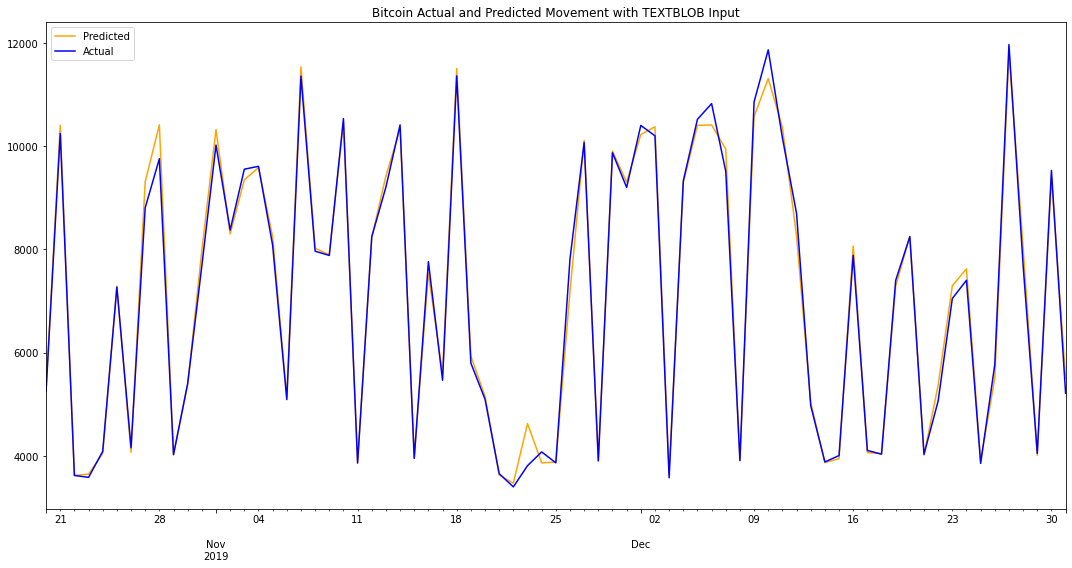

In [58]:
testplt = testdf

plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams["figure.autolayout"] = True

plt.title('Bitcoin Actual and Predicted Movement with TEXTBLOB Input')

testplt = testplt.set_index(pd.date_range('2019-10-20', periods = len(testplt)))

axis1 = testplt.predicted.plot(color = 'orange', label = 'Predicted')
#axis2 = testplt.actual.plot(color = 'blue', secondary_y=True, label='Actual')
axis2 = testplt.actual.plot(color = 'blue', label='Actual')


h1, l1 = axis1.get_legend_handles_labels()
h2, l2 = axis2.get_legend_handles_labels()

#plt.legend(h1+h2, l1+l2, loc=2)
plt.legend(h1, l1, loc=2)


plt.show()
